# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
# I acknowledge that I have used AI to the extent permitted by the UVA
# AI acceptable use policy. I acknowlegde that I am aware of the possibility
# of AI producing errors and offensive content and certify that I
# have taken the necessary measures to ensure that the work produced is both
# accurate and ethical to the best of my ability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Question 1




**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
# Question 2.1
college = pd.read_csv('college_completion.csv')

In [20]:
# Question 2.2
college.head(10)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


In [21]:
print(college.shape)

(3798, 63)


In [4]:
# Question 2.3
crosstab = pd.crosstab(college['control'], college['level'])
print(crosstab)

ratio = pd.crosstab(college['control'], college['level'], normalize = True)
print(ratio)

# The crosstab shows that private 4-year not-for-profit colleges have the most
# graduates while 2 year private not-for-profit colleges have the least.
# Public 2 year colleges have more graduates than their 4 year counterparts - a
# relative difference that is only the case for public colleges. For both private
# for-profit and not-for-profit colleges, the 4 year programs have more graduates
# than their 2 year programs do.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


/tmp/ipython-input-543967172.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(college['grad_100_value'], shade=True)


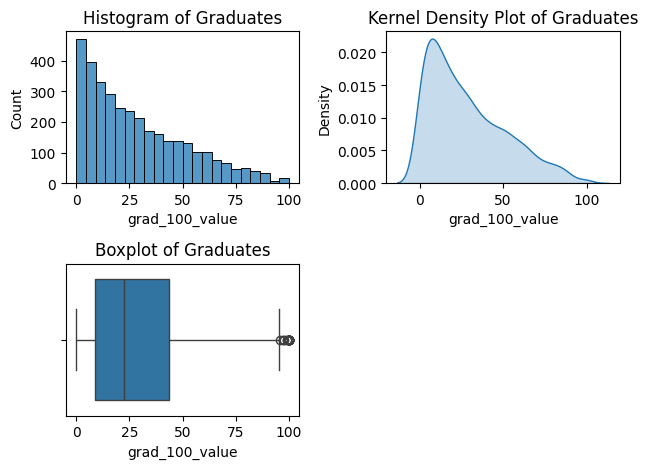

In [5]:
# Question 2.4 For grad_100_value, create a histogram, kernel density plot,
# boxplot, and statistical description.


plt.subplot(2, 2, 1)
sns.histplot(college['grad_100_value'], kde=False)
plt.title('Histogram of Graduates')

plt.subplot(2, 2, 2)
sns.kdeplot(college['grad_100_value'], shade=True)
plt.title('Kernel Density Plot of Graduates')


plt.subplot(2, 2, 3)
sns.boxplot(x=college['grad_100_value'])
plt.title('Boxplot of Graduates')

plt.tight_layout()
plt.show()

desc = college['grad_100_value'].describe()

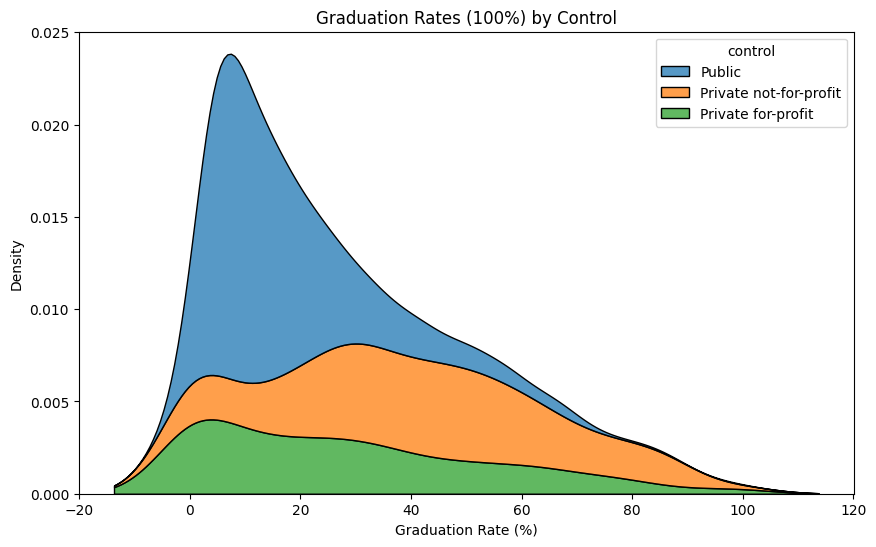

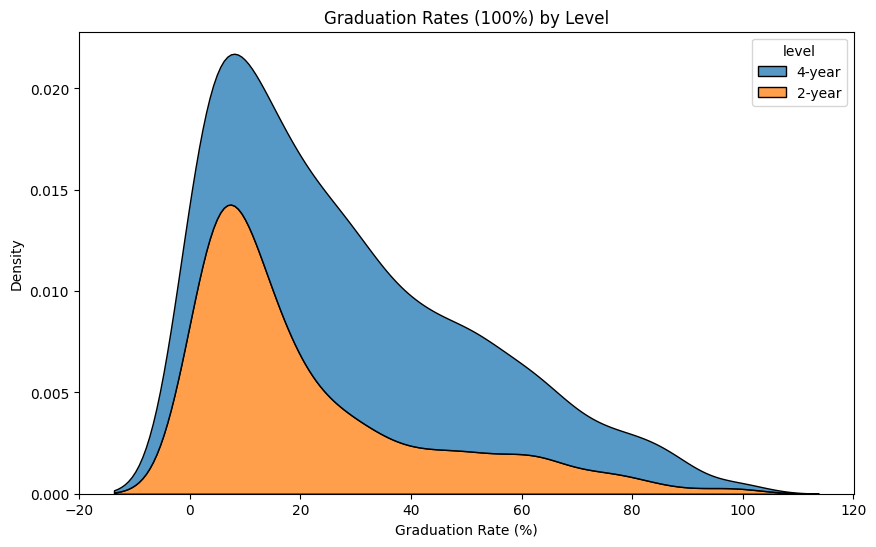

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [6]:
# Question 2.5
# For grad_100_value, create a grouped kernel density plot by control and by level.
# Describe what you see. Use groupby and .describe to make grouped calculations
# of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=college,
    x="grad_100_value",
    hue="control",
    multiple="stack",
)
plt.title("Graduation Rates (100%) by Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=college,
    x="grad_100_value",
    hue="level",
    multiple="stack"
)
plt.title("Graduation Rates (100%) by Level")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

# The control density plot shows us that public schools have a higher graduation
# rate peak around 10-12%. The private schools have a more even density but with
# slightly different peaks. Private for-profit schools' graduation rates
# peak between roughly 4-6% while private not-for-profit schools peak around 30-35%
# graduation rates. The public school slope is larger since it yields the greatest
# raw number of graduates, compared to private for-profit and private not-for-profit
# schools.
# For the density plot by level, we see the slopes more closely mirror each other.
# The 2 year and 4 year schools' shapes are similar, but that of 4 year schools is
# higher than the 2 year schools' slope. That said, they both have theur peak densities
# around 10-12% graduation rates. The 4 year schools have a more steady decrease in density
# as graduation rate increases whereas the 2 year schools have a more drastic
# decrease in density as graduation rate increases.



college.groupby(["level", "control"])["grad_100_value"].describe()

# The data show that, on average, 2 year private not-for-profit and 4 year
# private not-for-profit tend to have the best graduation rates (2 year private
# NFP is slightlty higher than 4 year private NFP).




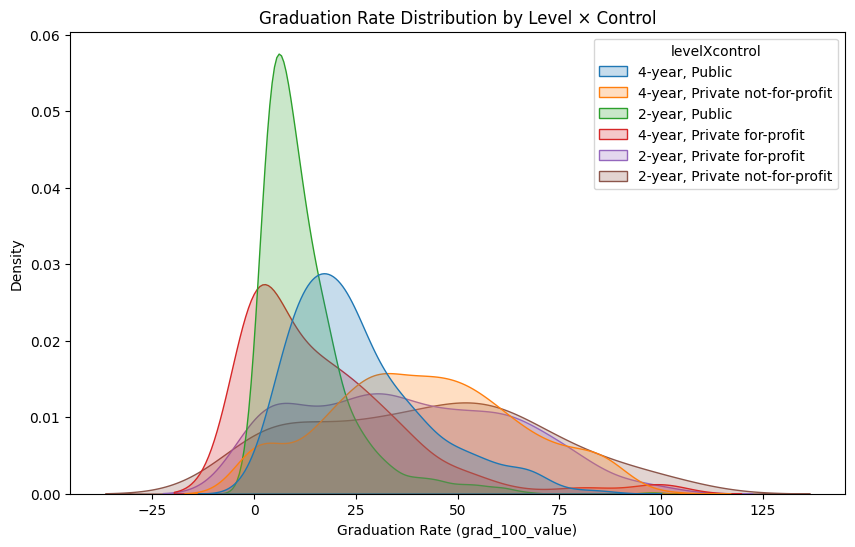

In [15]:
# Question 2.6 Create a new variable, df['levelXcontrol']=df['level']+',
# '+df['control'] that interacts level and control. Make a grouped kernel density plot.
# Which institutions appear to have the best graduation rates?

college['levelXcontrol'] = college['level'] + ', ' + college['control']

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=college,
    x='grad_100_value',
    hue='levelXcontrol',
    common_norm=False,
    fill=True,
)

plt.title("Graduation Rate Distribution by Level × Control")
plt.xlabel("Graduation Rate (grad_100_value)")
plt.ylabel("Density")
levels = college['levelXcontrol'].unique()
colors = sns.color_palette(n_colors=len(levels))
plt.show()


In [ ]:
# Question 2.7 Make a kernel density plot of aid_value. Now group your graph by
# level and control. What explains the shape of the graph? Use groupby and .describe
# to make grouped calculations of statistical descriptions of aid_value by level and control.

In [ ]:
# Question 2.8 Make a scatterplot of grad_100_value by aid_value. Describe what you see.
# Now make the same plot, grouping by level and then control. Describe what you see.
# For which kinds of institutions does aid seem to increase graduation rates?

